# Data Mining in Physics - Presentation 3. - DAGUR 5.3: Standard errors and confidence intervals

In [1]:
library(microbenchmark)
library(graphics)
library(ggplot2)

In [2]:
options(jupyter.plot_scale=1.4)

## 1. Load and fit the `DAAG::roller` dataset again

In [3]:
library(lattice)
library(DAAG)

In [4]:
# Export the `roller` dataset from DAAG
df = DAAG::roller
# Extract X and y data
x = df$weight
y = df$depression

In [8]:
# Fit linear model to the weight(depression) values
roller.lm = lm(depression ~ weight, data=df)
# Use the extractor function summary() to summarize results
summary(roller.lm)


Call:
lm(formula = depression ~ weight, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-8.180 -5.580 -1.346  5.920  8.020 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -2.0871     4.7543  -0.439  0.67227   
weight        2.6667     0.7002   3.808  0.00518 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.735 on 8 degrees of freedom
Multiple R-squared:  0.6445,	Adjusted R-squared:  0.6001 
F-statistic:  14.5 on 1 and 8 DF,  p-value: 0.005175


## 2. Calculate confidence interval

In case of linear regression:
\begin{equation}
L_{\mathrm{conf}}
=
b \pm t_{97.5\%} \sigma_{b}
\end{equation}
- $b$ : intercept 
- $t_{97.5\%}$ : $97.5\%$ of values of the t-distribution
- $\sigma_{b}$ : standard error of intercept at a given point

In [28]:
# Confidence interval calculations
SEb = summary(roller.lm)$coefficients[2, 2]
coef(roller.lm)[2] + qt(c(0.025, 0.975), 8)*SEb

[1] 1.051984 4.281508

In [20]:
# Obtain fitted values and standard errors (SE, then SE.OBS)
fit.with.se = predict(roller.lm, se.fit=TRUE)

In [21]:
# SE : Standard error
fit.with.se$se.fit

[1] 3.614297 2.976896 2.880798 2.308147 2.197133 2.130050 2.142445 2.384221
 [9] 3.370270 4.917728

In [22]:
# SE.OBS : Precision of predicting an observation
sqrt(fit.with.se$se.fit**2+fit.with.se$residual.scale**2)

[1] 7.643943 7.364009 7.325689 7.119990 7.084781 7.064265 7.068012 7.145014
 [9] 7.531629 8.339710

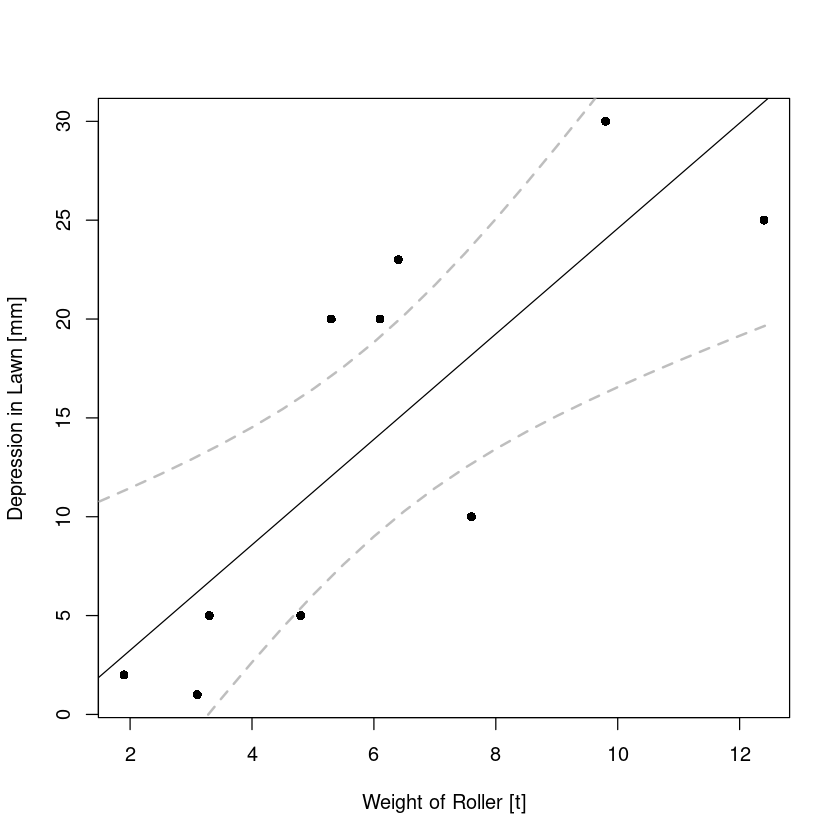

In [19]:
## Plot depression vs weight, with 95\% pointwise bounds for the fitted line
plot(depression ~ weight, data=roller,
     xlab = "Weight of Roller [t]",
     ylab = "Depression in Lawn [mm]", pch = 16)

abline(roller.lm$coef, lty = 1)

xy = data.frame(weight = pretty(roller$weight, 20))
yhat = predict(roller.lm, newdata = xy, interval="confidence")
ci = data.frame(lower=yhat[, "lwr"], upper=yhat[, "upr"])
lines(xy$weight, ci$lower, lty = 2, lwd=2, col="grey")
lines(xy$weight, ci$upper, lty = 2, lwd=2, col="grey")